In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

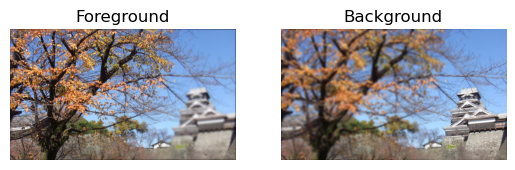

In [2]:
# Load images
bg = cv.imread('images/5bg.jpg')
fg = cv.imread('images/5fg.jpg')

# Show fg_HPF and bg_HPF
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground")
plt.imshow(cv.cvtColor(fg, cv.COLOR_BGR2RGB))
plt.subplot(122)
plt.axis('off')
plt.title("Background")
plt.imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))

# BGR to GRAY, and uint8 to double[0,1]
fg = cv.cvtColor(fg, cv.COLOR_BGR2GRAY).astype(np.float32)/255 
bg = cv.cvtColor(bg, cv.COLOR_BGR2GRAY).astype(np.float32)/255


True

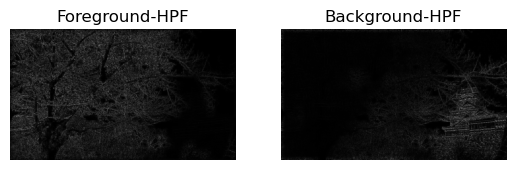

In [3]:
# High-pass filter (Laplacian)
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
fg = abs(cv.filter2D(fg,-1,laplacian))
bg = abs(cv.filter2D(bg,-1,laplacian))

# Show fg_HPF and bg_HPF
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground-HPF")
plt.imshow(fg,"gray")
plt.subplot(122)
plt.axis('off')
plt.title("Background-HPF")
plt.imshow(bg,"gray")

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2-fg-HPF.jpg', (fg*255).astype(np.uint8))
cv.imwrite('images/ex2.1.2-bg-HDF.jpg', (bg*255).astype(np.uint8))

True

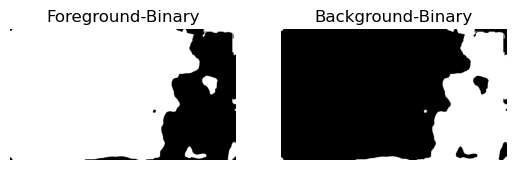

In [4]:
# mask = fg_HPF -  bg_HPF
mask = fg - bg
# Mean filter, kernel size must be bigger.
img_blur = cv.blur(mask,(20,20))
# Binary the mask 
mask_fg = (img_blur>0)
mask_bg = (img_blur<0)

# Show fg_mask and bg_mask
fig = plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title("Foreground-Binary")
plt.imshow(mask_fg,"gray")
plt.subplot(122)
plt.axis('off')
plt.title("Background-Binary")
plt.imshow(mask_bg,"gray")

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2-fg-mask.jpg', (mask_fg*255).astype(np.uint8))
cv.imwrite('images/ex2.1.2-bg-mask.jpg', (mask_bg*255).astype(np.uint8))

True

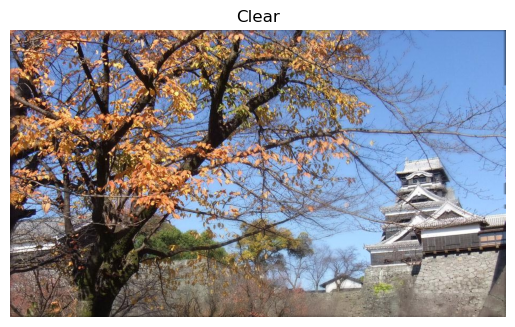

In [5]:
# Relaod images
bg = cv.imread('images/5bg.jpg')
fg = cv.imread('images/5fg.jpg')
# Clear image with binary-mask
fg_clear = cv.merge([fg[:,:,0]*mask_fg, fg[:,:,1]*mask_fg, fg[:,:,2]*mask_fg])
bg_clear = cv.merge([bg[:,:,0]*mask_bg, bg[:,:,1]*mask_bg, bg[:,:,2]*mask_bg])
# clear=fg+bg
clear = fg_clear+bg_clear

# Show clear image
fig = plt.figure()
plt.axis('off')
plt.title("Clear")
plt.imshow(cv.cvtColor(clear, cv.COLOR_BGR2RGB))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.1.2.jpg', clear)